In [61]:
# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

# скрыть код со всех ячеек 
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 

## имеем данные по каждому АЗС

### импортируем - АЗС 1

In [47]:
df1 = pd.read_excel("ass/Crimea_ass1.xlsx")

In [48]:
df1[:3]

,Unnamed: 0.1,Unnamed: 0,date,receipt,product,group_of_products,store,city,sold_quantity,tunover_no_VAT,tunover_VAT,purchase_price_VAT,purchase_cost_VAT,margin_VAT,profit,temperature
0,0,1,2017-09-21,5,"ИВ Лимонад Лаймони 0,6 л стекло","ВКУСОВАЯ, СЛАДКАЯ ВОДА, НАПИТКИ",АЗС № 1,Симферополь г,1,NaN,70.0,48.30,48.30,21.70,21.70,NaN
1,1,3,2017-09-21,6,"Вода Волна Байкала 0,5 л негаз",БЕЛАЯ ВОДА,АЗС № 1,Симферополь г,1,NaN,40.0,26.57,26.57,13.43,13.43,NaN
2,2,5,2017-09-21,7,"Вода Волна Байкала 0,5 л негаз",БЕЛАЯ ВОДА,АЗС № 1,Симферополь г,3,NaN,120.0,26.57,79.71,40.29,13.43,NaN


### группируем по дате и товару, 
#### считаем сумму выручки по товару
#### создаем столбец с месяцем 

In [49]:
data1 = df1.groupby(["date", "product"], as_index=True).agg(
   count = ("product","count"), profit = ("margin_VAT","sum")
).reset_index()

In [50]:
data1['month'] = data1['date'].dt.month
data1[:2]

,date,product,count,profit,month
0,2017-09-21,"Вода Волна Байкала 0,5 л негаз",8,161.16,9
1,2017-09-21,"Вода Крым Аква 1,5 л газ ПЭТ",2,31.50,9


# A B C
#### Группируем каждый товар
#### Считаем количество товаров
#### Выручка по каждому

In [51]:
df_abc1 = data1.groupby(["product"], as_index=True).agg(
   count = ("product","count"), profit = ("profit","sum")
).reset_index()
df_abc1[:2]

,product,count,profit
0,"AVS Влажные салфетки ""Для Салона"", 25 шт.",3,51.0
1,"AVS Влажные салфетки ""Для салона из кожи"", 25 шт.",6,102.0


## пишем функции, где считаем класс (A / B / С)
#### Группируем товар, сортируем, подсчитываем ранг, по условию присваиваем класс 

In [55]:
def ABC_analysis(df):
    grouped_df = (
            df.loc[:, ['product','profit']]
            .groupby('product')
            .sum()         
        )

    grouped_df = grouped_df.sort_values(by=['profit'], ascending=False)
    
    ## Ranking by importance
    grouped_df["Rank"] = grouped_df['profit'].rank(ascending = False)
    grouped_df["ABC"] = ' '
    grouped_df = grouped_df.reset_index()

    ## Checking the Importance of the Customers and Categorising into class A,B,C and splitting based on 20-30-50
    grouped_df['ABC'][0: int(0.2 * grouped_df['Rank'].max())] = 'A'
    grouped_df['ABC'][int(0.2 * grouped_df['Rank'].max()) : int(0.5 * grouped_df['Rank'].max())] = 'B'
    grouped_df['ABC'][int(0.5 * grouped_df['Rank'].max()): ] = 'C'                  
    
    return grouped_df
ABC_groups1 = ABC_analysis(df_abc1)
ABC_groups1[:3]

,product,profit,Rank,ABC
0,Кофе с молоком 160 мл АЗС № 11,172705.45,1.0,A
1,Кофе Американо 160 мл АЗС 11,152547.24,2.0,A
2,Омыватель зимний Мустанг 5 л,125707.82,3.0,A


### Посмотрим на объем каждой группы 

C    511
B    306
A    204
Name: ABC, dtype: int64

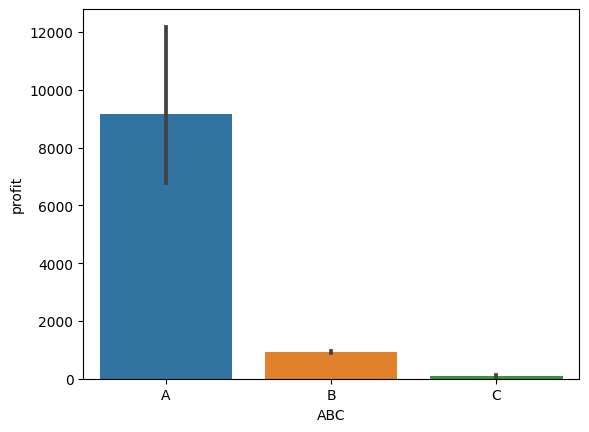

In [57]:
sns.barplot(x = 'ABC', y = 'profit',data = ABC_groups1)
ABC_groups1['ABC'].value_counts()

### вклад каждой группы – какой доход

In [60]:
ABC_groups1.groupby('ABC')['profit'].sum() / ABC_groups1['profit'].sum() * 100.

ABC
A    85.187226
B    12.925894
C     1.886880
Name: profit, dtype: float64

# x y z

In [10]:

df_xyz2 = data2.groupby(['product','month'])['count'].sum().to_frame().reset_index()
df_xyz3 = data3.groupby(['product','month'])['count'].sum().to_frame().reset_index()
df_xyz4 = data4.groupby(['product','month'])['count'].sum().to_frame().reset_index()
df_xyz11 = data11.groupby(['product','month'])['count'].sum().to_frame().reset_index()

In [11]:
df_xyz1 = df_xyz1.pivot(index='product', columns='month', values='count').add_prefix('m').reset_index().fillna(0)
df_xyz2 = df_xyz2.pivot(index='product', columns='month', values='count').add_prefix('m').reset_index().fillna(0)
df_xyz3 = df_xyz3.pivot(index='product', columns='month', values='count').add_prefix('m').reset_index().fillna(0)
df_xyz4 = df_xyz4.pivot(index='product', columns='month', values='count').add_prefix('m').reset_index().fillna(0)
df_xyz11 = df_xyz11.pivot(index='product', columns='month', values='count').add_prefix('m').reset_index().fillna(0)
df_xyz11.head(2)

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,21 век blue,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21 век dark blue MT,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_xyz1['Стандартное отклонение спроса'] = df_xyz1[['m1','m2','m3','m4','m5','m6',
                                    'm7','m8','m9','m10','m11','m12']].std(axis=1)
df_xyz2['Стандартное отклонение спроса'] = df_xyz2[['m1','m2','m3','m4','m5','m6',
                                    'm7','m8','m9','m10','m11','m12']].std(axis=1)
df_xyz3['Стандартное отклонение спроса'] = df_xyz3[['m1','m2','m3','m4','m5','m6',
                                    'm7','m8','m9','m10','m11','m12']].std(axis=1)
df_xyz4['Стандартное отклонение спроса'] = df_xyz4[['m1','m2','m3','m4','m5','m6',
                                    'm7','m8','m9','m10','m11','m12']].std(axis=1)
df_xyz11['Стандартное отклонение спроса'] = df_xyz11[['m1','m2','m3','m4','m5','m6',
                                    'm7','m8','m9','m10','m11','m12']].std(axis=1)

In [13]:
df_xyz1 = df_xyz1.assign(Общий_спрос = df_xyz1['m1'] + df_xyz1['m2'] + \
                                                 df_xyz1['m3'] + df_xyz1['m4'] + \
                                                 df_xyz1['m5'] + df_xyz1['m6'] + \
                                                 df_xyz1['m7'] + df_xyz1['m8'] + \
                                                 df_xyz1['m9'] + df_xyz1['m10'] + \
                                                 df_xyz1['m11'] + df_xyz1['m12']
                                  )
df_xyz2 = df_xyz2.assign(Общий_спрос = df_xyz2['m1'] +  df_xyz2['m2'] + \
                                                 df_xyz2['m3'] + df_xyz2['m4'] + \
                                                 df_xyz2['m5'] + df_xyz2['m6'] + \
                                                 df_xyz2['m7'] + df_xyz2['m8'] + \
                                                 df_xyz2['m9'] + df_xyz2['m10'] + \
                                                 df_xyz2['m11'] + df_xyz2['m12']
                                  )
df_xyz3 = df_xyz3.assign(Общий_спрос = df_xyz3['m1'] + df_xyz3['m2'] + \
                                                 df_xyz3['m3'] + df_xyz3['m4'] + \
                                                 df_xyz3['m5'] + df_xyz3['m6'] + \
                                                 df_xyz3['m7'] + df_xyz3['m8'] + \
                                                 df_xyz3['m9'] + df_xyz3['m10'] + \
                                                 df_xyz3['m11'] + df_xyz3['m12']
                                  )
df_xyz4 = df_xyz4.assign(Общий_спрос = df_xyz4['m1'] + df_xyz4['m2'] + \
                                                 df_xyz4['m3'] + df_xyz4['m4'] + \
                                                 df_xyz4['m5'] + df_xyz4['m6'] + \
                                                 df_xyz4['m7'] + df_xyz4['m8'] + \
                                                 df_xyz4['m9'] + df_xyz4['m10'] + \
                                                 df_xyz4['m11'] + df_xyz4['m12']
                                  )
df_xyz11 = df_xyz11.assign(Общий_спрос = df_xyz11['m1'] + df_xyz11['m2'] + \
                                                 df_xyz11['m3'] + df_xyz11['m4'] + \
                                                 df_xyz11['m5'] + df_xyz11['m6'] + \
                                                 df_xyz11['m7'] + df_xyz11['m8'] + \
                                                 df_xyz11['m9'] + df_xyz11['m10'] + \
                                                 df_xyz11['m11'] + df_xyz11['m12']
                                  )

In [14]:
df_xyz1 = df_xyz1.assign(Среднемесячный_спрос = df_xyz1['Общий_спрос'] / 12 )
df_xyz2 = df_xyz2.assign(Среднемесячный_спрос = df_xyz2['Общий_спрос'] / 12 )
df_xyz3 = df_xyz3.assign(Среднемесячный_спрос = df_xyz3['Общий_спрос'] / 12 )
df_xyz4 = df_xyz4.assign(Среднемесячный_спрос = df_xyz4['Общий_спрос'] / 12 )
df_xyz11 = df_xyz11.assign(Среднемесячный_спрос = df_xyz11['Общий_спрос'] / 12 )

In [15]:
df_xyz1['Коэффициент'] = df_xyz1['Стандартное отклонение спроса'] / df_xyz1['Среднемесячный_спрос']
df_xyz2['Коэффициент'] = df_xyz2['Стандартное отклонение спроса'] / df_xyz2['Среднемесячный_спрос']
df_xyz3['Коэффициент'] = df_xyz3['Стандартное отклонение спроса'] / df_xyz3['Среднемесячный_спрос']
df_xyz4['Коэффициент'] = df_xyz4['Стандартное отклонение спроса'] / df_xyz4['Среднемесячный_спрос']
df_xyz11['Коэффициент'] = df_xyz11['Стандартное отклонение спроса'] / df_xyz11['Среднемесячный_спрос']

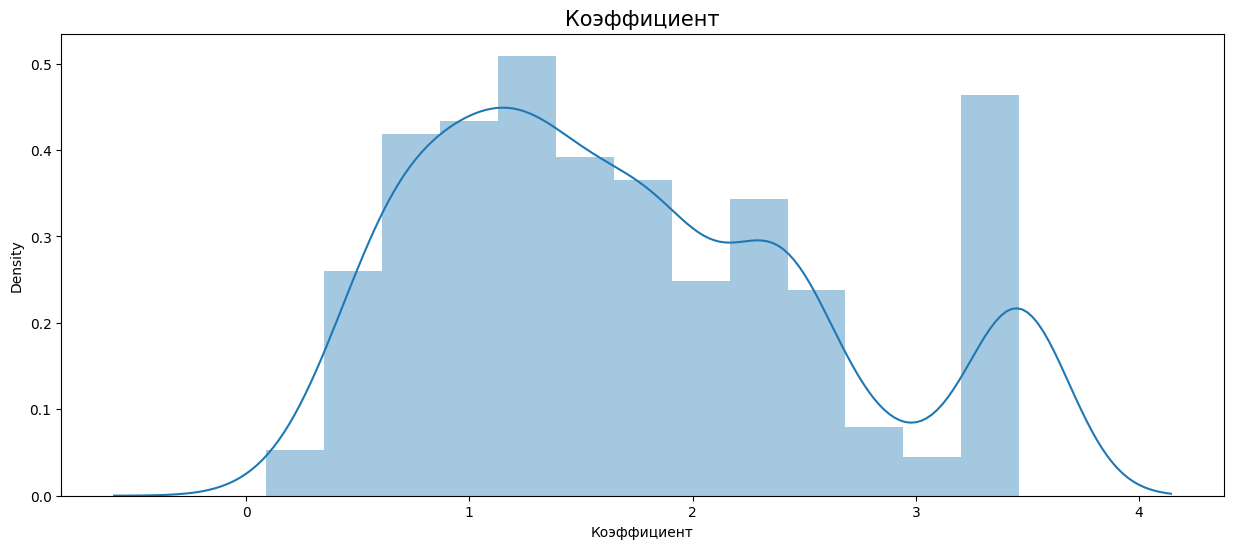

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(df_xyz1['Коэффициент']).set_title("Коэффициент",fontsize=15)

In [17]:
def xyz_classify_product1(cov):
    if cov <= 0.2:
        return 'X'
    elif cov > 0.2 and cov <= 0.5:
        return 'Y'
    else:
        return 'Z'
df_xyz1['xyz'] = df_xyz1['Коэффициент'].apply(xyz_classify_product1)
df_xyz1.xyz.value_counts()

Z    980
Y     38
X      3
Name: xyz, dtype: int64

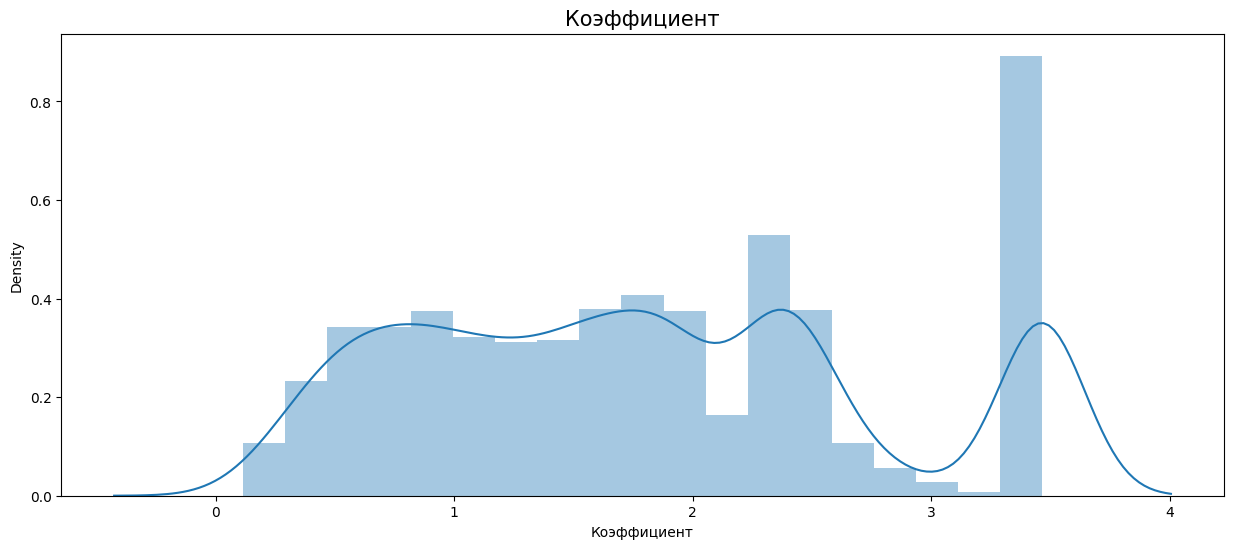

In [18]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(df_xyz2['Коэффициент']).set_title("Коэффициент",fontsize=15)

In [19]:
def xyz_classify_product2(cov):
    if cov <= 0.3:
        return 'X'
    elif cov > 0.3 and cov <= 0.4:
        return 'Y'
    else:
        return 'Z'
df_xyz2['xyz'] = df_xyz2['Коэффициент'].apply(xyz_classify_product2)
df_xyz2.xyz.value_counts()

Z    4282
Y      94
X      91
Name: xyz, dtype: int64

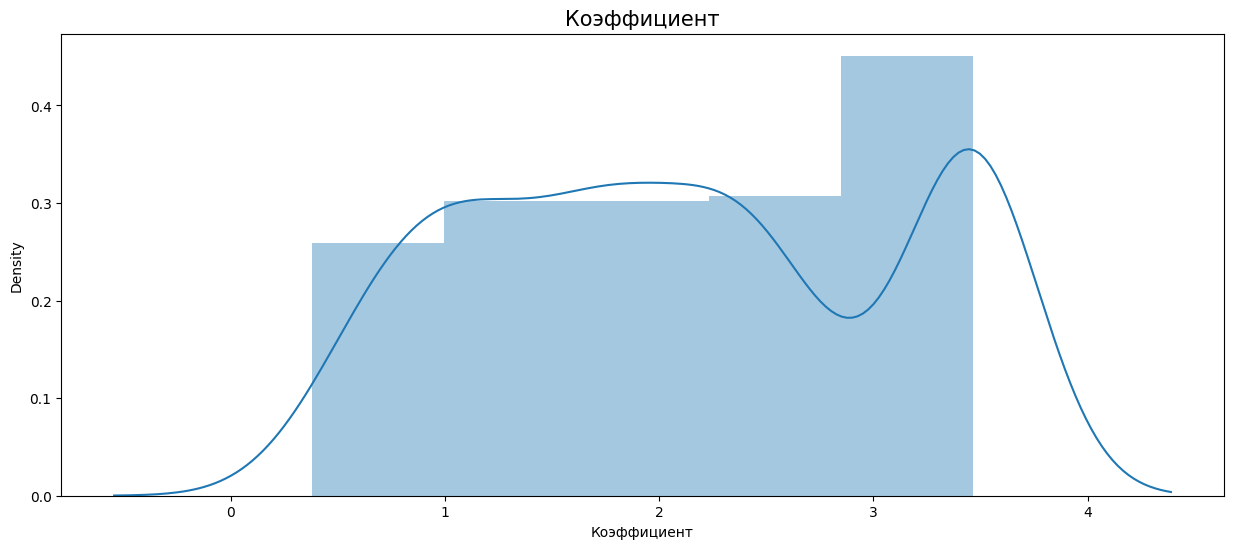

In [20]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(df_xyz3['Коэффициент']).set_title("Коэффициент",fontsize=15)

In [21]:
def xyz_classify_product3(cov):
    if cov <= 0.3:
        return 'X'
    elif cov > 0.3 and cov <= 0.4:
        return 'Y'
    else:
        return 'Z'
df_xyz3['xyz'] = df_xyz3['Коэффициент'].apply(xyz_classify_product3)
df_xyz3.xyz.value_counts()

Z    337
Y      1
Name: xyz, dtype: int64

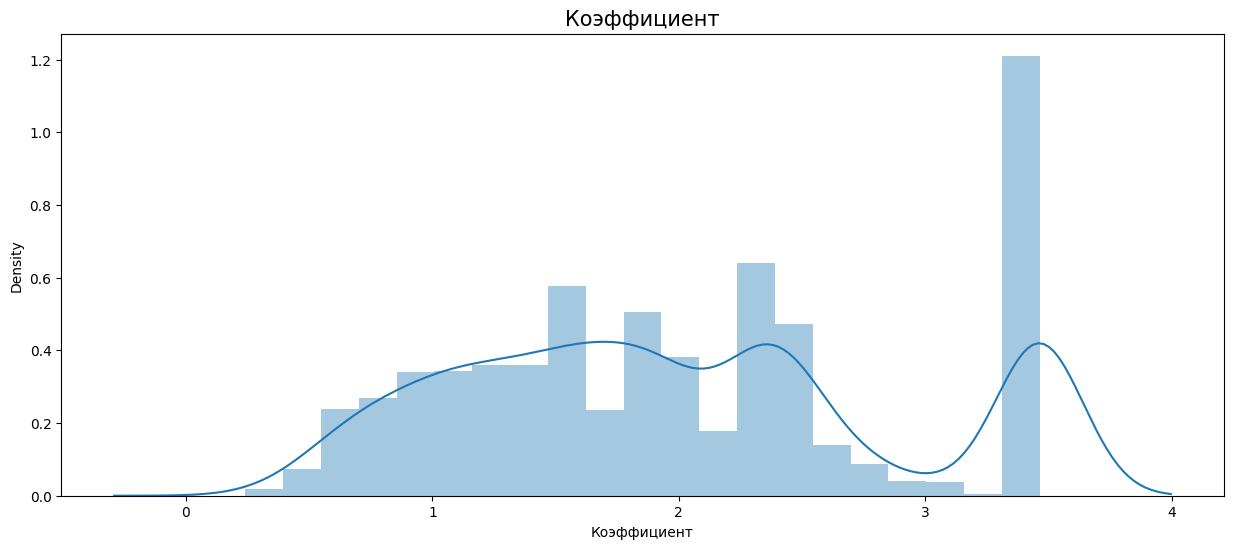

In [22]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(df_xyz4['Коэффициент']).set_title("Коэффициент",fontsize=15)

In [23]:
def xyz_classify_product4(cov):
    if cov <= 0.35:
        return 'X'
    elif cov > 0.35 and cov <= 0.5:
        return 'Y'
    else:
        return 'Z'
df_xyz4['xyz'] = df_xyz4['Коэффициент'].apply(xyz_classify_product4)
df_xyz4.xyz.value_counts()

Z    3206
Y      24
X       5
Name: xyz, dtype: int64

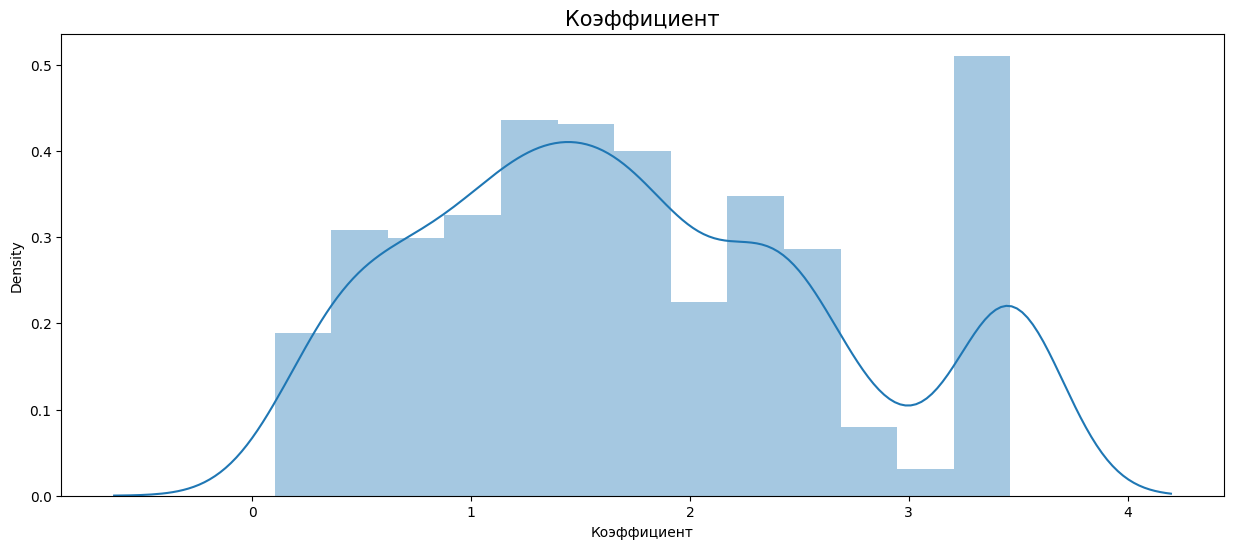

In [24]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(df_xyz11['Коэффициент']).set_title("Коэффициент",fontsize=15)

In [25]:
def xyz_classify_product11(cov):
    if cov <= 0.25:
        return 'X'
    elif cov > 0.25 and cov <= 0.4:
        return 'Y'
    else:
        return 'Z'

In [26]:
df_xyz11['xyz'] = df_xyz11['Коэффициент'].apply(xyz_classify_product11)
df_xyz11.xyz.value_counts()

Z    822
Y     40
X     17
Name: xyz, dtype: int64

In [27]:
df_xyz11[:2]

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,Стандартное отклонение спроса,Общий_спрос,Среднемесячный_спрос,Коэффициент,xyz
0,21 век blue,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.015095,8.0,0.666667,3.022642,Z
1,21 век dark blue MT,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.775251,8.0,0.666667,2.662876,Z


# abc

In [28]:
# df_abc1 = data1.groupby(["product"], as_index=True).agg(
#    count = ("product","count"), profit = ("profit","sum")
# ).reset_index()
# df_abc2 = data2.groupby(["product"], as_index=True).agg(
#    count = ("product","count"), profit = ("profit","sum")
# ).reset_index()
# df_abc3 = data3.groupby(["product"], as_index=True).agg(
#    count = ("product","count"), profit = ("profit","sum")
# ).reset_index()
# df_abc4 = data4.groupby(["product"], as_index=True).agg(
#    count = ("product","count"), profit = ("profit","sum")
# ).reset_index()
# df_abc11 = data11.groupby(["product"], as_index=True).agg(
#    count = ("product","count"), profit = ("profit","sum")
# ).reset_index()

# df_abc11[:2]

,product,count,profit
0,21 век blue,5,91.5
1,21 век dark blue MT,7,91.5


In [29]:
# def ABC_analysis(df):
#     grouped_df = (
#             df.loc[:, ['product','profit']]
#             .groupby('product')
#             .sum()         
#         )

#     grouped_df = grouped_df.sort_values(by=['profit'], ascending=False)
    
#     ## Ranking by importance
#     grouped_df["Rank"] = grouped_df['profit'].rank(ascending = False)
#     grouped_df["ABC"] = ' '
#     grouped_df = grouped_df.reset_index()

#     ## Checking the Importance of the Customers and Categorising into class A,B,C and splitting based on 20-30-50
#     grouped_df['ABC'][0: int(0.2 * grouped_df['Rank'].max())] = 'A'
#     grouped_df['ABC'][int(0.2 * grouped_df['Rank'].max()) : int(0.5 * grouped_df['Rank'].max())] = 'B'
#     grouped_df['ABC'][int(0.5 * grouped_df['Rank'].max()): ] = 'C'                  
    
#     return grouped_df

In [30]:
# ABC_groups1 = ABC_analysis(df_abc1)
# ABC_groups2 = ABC_analysis(df_abc2)
# ABC_groups3 = ABC_analysis(df_abc3)
# ABC_groups4 = ABC_analysis(df_abc4)
# ABC_groups11 = ABC_analysis(df_abc11)

C    511
B    306
A    204
Name: ABC, dtype: int64

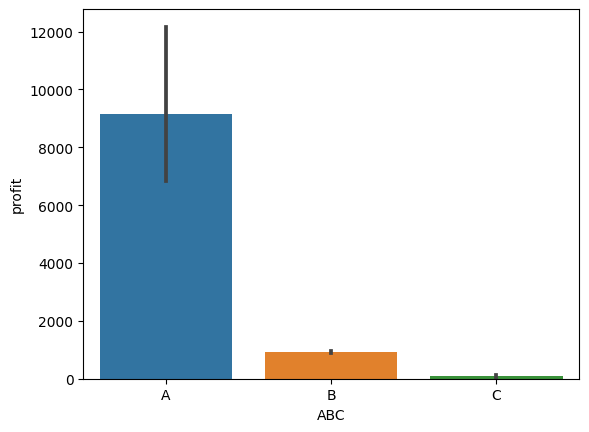

In [31]:
sns.barplot(x = 'ABC', y = 'profit',data = ABC_groups1)
ABC_groups1['ABC'].value_counts()

C    2234
B    1340
A     893
Name: ABC, dtype: int64

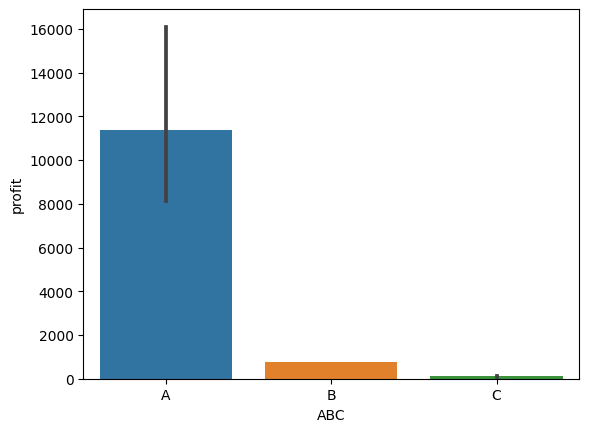

In [32]:
sns.barplot(x = 'ABC', y = 'profit',data = ABC_groups2)
ABC_groups2['ABC'].value_counts()

C    169
B    102
A     67
Name: ABC, dtype: int64

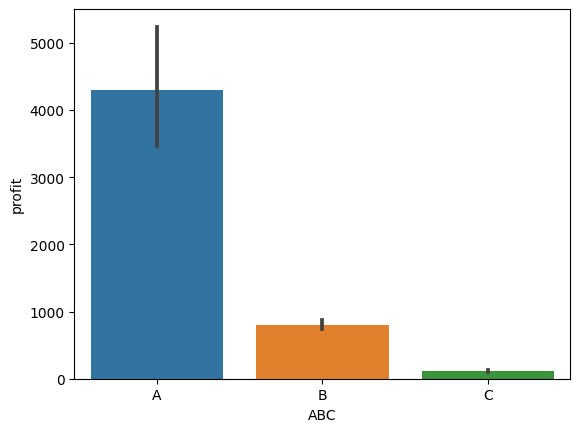

In [33]:
sns.barplot(x = 'ABC', y = 'profit',data = ABC_groups3)
ABC_groups3['ABC'].value_counts()

C    1618
B     970
A     647
Name: ABC, dtype: int64

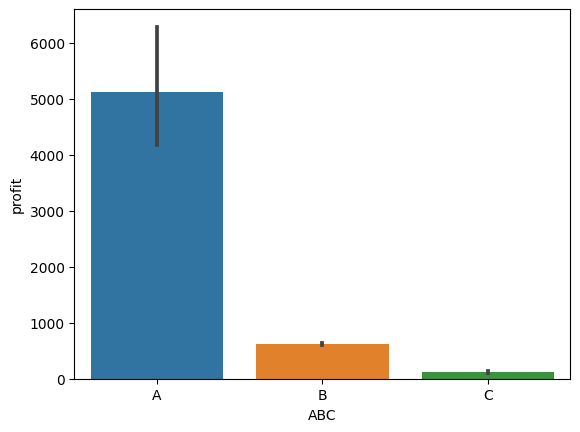

In [34]:
sns.barplot(x = 'ABC', y = 'profit',data = ABC_groups4)
ABC_groups4['ABC'].value_counts()

C    440
B    264
A    175
Name: ABC, dtype: int64

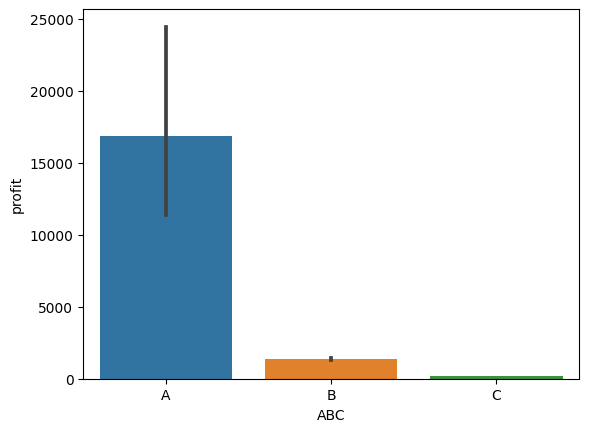

In [35]:
sns.barplot(x = 'ABC', y = 'profit',data = ABC_groups11)
ABC_groups11['ABC'].value_counts()

In [36]:
merge1 = pd.merge(ABC_groups1, df_xyz1,
                       how='inner', on='product')
merge1 = merge1.drop(['Rank',  'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
       'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'Стандартное отклонение спроса',
       'Общий_спрос', 'Среднемесячный_спрос', 'Коэффициент'], axis=1)
merge1 = merge1.rename(columns={ 'product':'Товар', 'profit': 'Доход', 'xyz': 'Класс_XYZ', 'ABC': 'Класс_ABC'})
merge1['Магазин'] = 'АЗС 1'

merge1.to_excel('fin/abc&xyz_Crimea_ass1.xlsx')

In [37]:
merge2 = pd.merge(ABC_groups2, df_xyz2,
                       how='inner', on='product')
merge2 = merge2.drop(['Rank',  'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
       'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'Стандартное отклонение спроса',
       'Общий_спрос', 'Среднемесячный_спрос', 'Коэффициент'], axis=1)
merge2 = merge2.rename(columns={ 'product':'Товар', 'profit': 'Доход', 'xyz': 'Класс_XYZ', 'ABC': 'Класс_ABC'})
merge2['Магазин'] = 'АЗС 2'

merge2.to_excel('fin/abc&xyz_Crimea_ass2.xlsx')

In [39]:
merge3 = pd.merge(ABC_groups3, df_xyz3,
                       how='inner', on='product')
merge3 = merge3.drop(['Rank',  'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
       'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'Стандартное отклонение спроса',
       'Общий_спрос', 'Среднемесячный_спрос', 'Коэффициент'], axis=1)
merge3 = merge3.rename(columns={ 'product':'Товар', 'profit': 'Доход', 'xyz': 'Класс_XYZ', 'ABC': 'Класс_ABC'})
merge3['Магазин'] = 'АЗС 3'

merge3.to_excel('fin/abc&xyz_Crimea_ass3.xlsx')

In [40]:
merge4 = pd.merge(ABC_groups4, df_xyz4,
                       how='inner', on='product')
merge4 = merge4.drop(['Rank',  'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
       'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'Стандартное отклонение спроса',
       'Общий_спрос', 'Среднемесячный_спрос', 'Коэффициент'], axis=1)
merge4 = merge4.rename(columns={ 'product':'Товар', 'profit': 'Доход', 'xyz': 'Класс_XYZ', 'ABC': 'Класс_ABC'})
merge4['Магазин'] = 'АЗС 4'

merge4.to_excel('fin/abc&xyz_Crimea_ass4.xlsx')

In [41]:
merge11 = pd.merge(ABC_groups11, df_xyz11,
                       how='inner', on='product')
merge11 = merge11.drop(['Rank',  'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
       'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'Стандартное отклонение спроса',
       'Общий_спрос', 'Среднемесячный_спрос', 'Коэффициент'], axis=1)
merge11 = merge11.rename(columns={ 'product':'Товар', 'profit': 'Доход', 'xyz': 'Класс_XYZ', 'ABC': 'Класс_ABC'})
merge11['Магазин'] = 'АЗС 11'

merge11.to_excel('fin/abc&xyz_Crimea_ass11.xlsx')

Товары A - 20% товаров, приносят 70% дохода

Товары B - 30% товаров, приносят 25% выручки

Товары C - 50% товаров, приносят 5% дохода